In [6]:
from functools import reduce, partial
import multiprocessing, matplotlib.pyplot as plt, numpy as np, random, math
from sklearn.preprocessing import StandardScaler        # Needed for PCA.
from sklearn.decomposition import PCA

In [7]:
def plot( fig, data, centroids, col_flag = False ):
    
    for i, d in enumerate( data ):
        col_indx = i // nk if col_flag is False else clusters[i]
        plt.scatter( d[1][0], d[1][1], color = colors[ col_indx ] )

    for i, cent in enumerate( centroids ):
        if cent is not None:
            plt.scatter( cent[0], cent[1], 500, marker = 'x', color = colors[i] )
    
    fig.show()

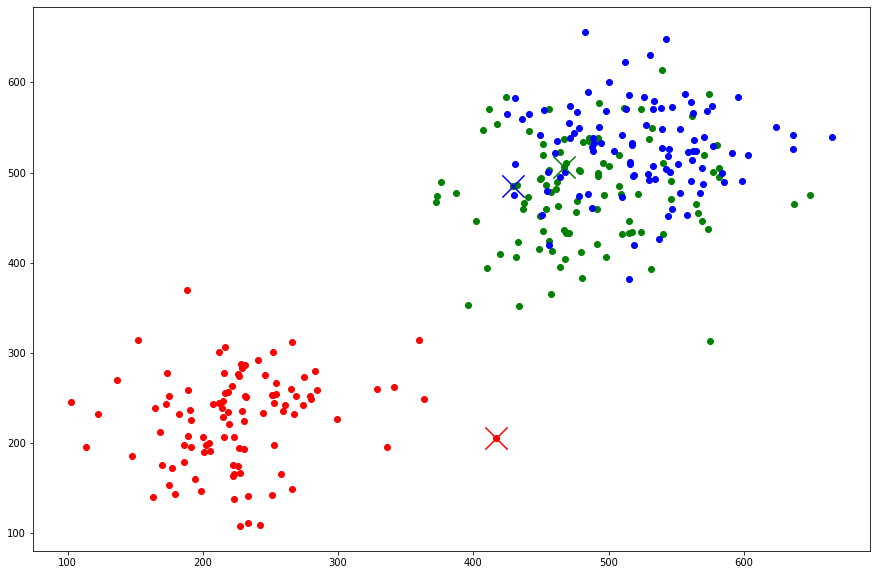

In [8]:
nk = 100                        # Number of samples in the cluster.
k = 3                           # Number of clusters.
N = nk * k
n_dim = 2
mu, sigma = 500, 50             # Mean and standard deviation.
colors = [ 'r', 'g', 'b' ]
data = []

fig, ax = plt.subplots( figsize = ( 15, 10 ) )

indx = 0
for i in range( k ):
    rnd = random.randint( i * 250, ( i + 1 ) * 250 )

    for j in range( nk ):
        point = [ np.random.normal( rnd, sigma ) for i in range( n_dim ) ]
        data.append( ( indx, np.array( point ) ) )
        indx += 1
        
centroids = [ np.array( data[ random.randint( 0, N ) ][1] ) for i in range( k ) ]

plot( fig, data, centroids )


[array([230.0531985 , 225.76127874]), array([519.87243306, 519.49990461]), array([433.87659601, 440.56805089])]
[array([224.83554922, 225.43864073]), array([523.259518  , 527.34256549]), array([454.3459386 , 439.99832556])]
[array([224.83554922, 225.43864073]), array([524.93400161, 531.54164298]), array([460.19176057, 443.34569104])]
[array([226.18541043, 226.32244771]), array([525.05002255, 531.98550235]), array([462.39466596, 445.68588027])]
[array([226.18541043, 226.32244771]), array([525.47589947, 533.2350265 ]), array([464.26829902, 447.06208098])]


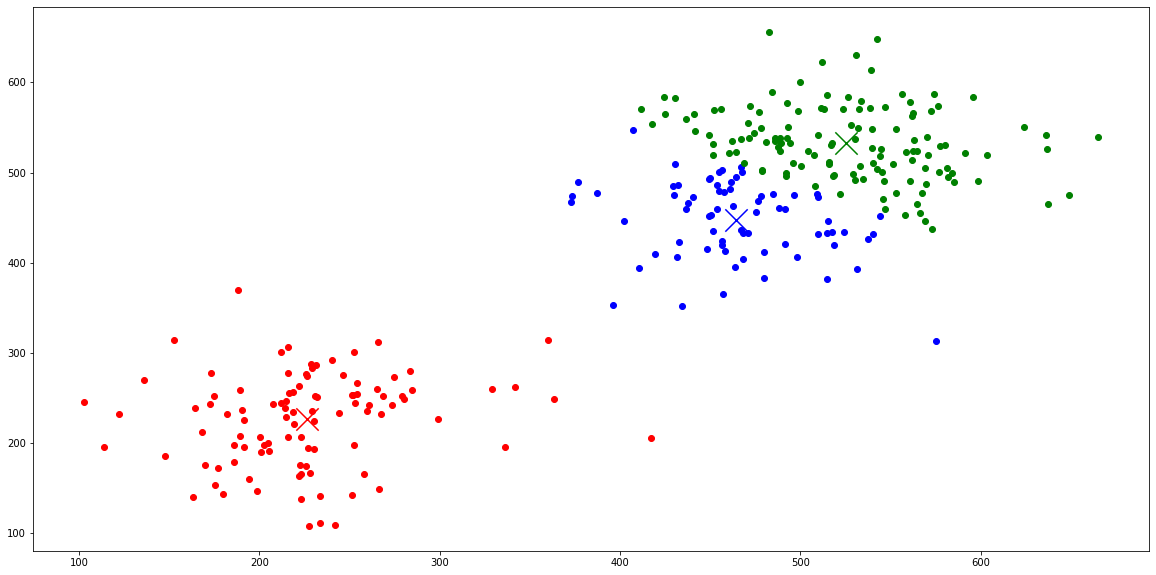

In [9]:
def dist( x, y ):
    return math.sqrt( sum( ( p - q ) ** 2.0 for p, q in zip( x, y ) ) )

def map_calc_dist( point ):
    return [ dist( point[1], centroids[i] ) for i in range( k ) ]

def reduce_find_closest( acc, x ):
    #return acc + [ x.index( min( x ) ) ]
    return acc + [ np.argmin( x ) ]

def reduce_test( acc, x ):
    return acc + x          # acc and x are numpy arrays.

def map_test( key, value ):
    acc = np.zeros( shape = ( n_dim ) )
    return reduce( reduce_test, value, acc ) / len( value )

parallel_dict = dict()

pool = multiprocessing.Pool( multiprocessing.cpu_count() )
clusters = None

for i in range( 5 ):

    # This is parallel.
    cent_dists = list( map( map_calc_dist, data ) )
    clusters = reduce( reduce_find_closest, cent_dists, [] )

    # Preparing data for parallel processing.
    for i in range( k ):
        parallel_dict[i] = list()

    for i in range( N ):
        cluster_number = clusters[i]
        parallel_dict[ cluster_number ].append( data[i][1] )

    centroids = list( pool.starmap( map_test, parallel_dict.items() ) )
    print( centroids )

pool.terminate()

fig, ax = plt.subplots( figsize = ( 20, 10 ) )

plot( fig, data, centroids, col_flag = True )

In [10]:
final_dict = dict()

for i in range( k ):
        final_dict[i] = list()

for i in range( N ):
    final_dict[ clusters[i] ].append( i )

for key, value in final_dict.items():
    print( key, ' -> ', value )

0  ->  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
1  ->  [100, 102, 106, 107, 110, 111, 113, 116, 118, 119, 121, 122, 125, 126, 127, 129, 132, 133, 134, 135, 136, 138, 140, 144, 148, 150, 151, 154, 156, 157, 159, 160, 163, 166, 170, 171, 173, 174, 179, 180, 185, 188, 190, 194, 195, 200, 201, 202, 204, 205, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 220, 221, 225, 226, 227, 228, 229, 230, 232, 233, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 246, 247, 248, 249, 250, 251, 253, 254, 255, 256, 257, 258, 259, 261, 262, 264, 265, 267, 269, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288,